In [86]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import statistics

In [2]:
df_birth_year = pd.read_csv('data/birth_year.csv')
df_birth_year

,auhtor_ID,post,birth_year
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001
...,...,...,...
41868,t2_mgcj65a,"honest, unbiased news media in the US. That's ...",1974
41869,t2_mgcj65a,"the house, therefore I don't technically *own*...",1974
41870,t2_mgcj65a,"to stop being afraid. Just to be clear here, d...",1974
41871,t2_mgcj65a,saying that if the 2016 election had gone the ...,1974


In [3]:
mil_and_genz = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]
mil_and_genz['binary_birth_year'] = mil_and_genz['birth_year']
mil_and_genz.loc[(1986 < mil_and_genz['birth_year']) & (mil_and_genz['birth_year'] <= 1096), 'binary_birth_year'] = 1
mil_and_genz.loc[(1096 < mil_and_genz['birth_year']) & (mil_and_genz['birth_year'] <= 2006), 'binary_birth_year'] = 0
mil_and_genz = mil_and_genz.reset_index(drop=True)
documents = mil_and_genz['post']

<ipython-input-3-9fec532ed052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_and_genz['binary_birth_year'] = mil_and_genz['birth_year']
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [4]:
mil = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 1996)] #jaartallen moeten nog aangepast worden
genz = df_birth_year[(1996 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]

In [5]:
mil.shape, genz.shape

((15553, 3), (9902, 3))

In [6]:
tokens_mil = mil.post.str.findall('\w+|[^\w\s]')
tokens_genz = genz.post.str.findall('\w+|[^\w\s]')
tokens_mil

17       [1890, -, something, ., The, exact, date, is, ...
18       [on, Saturday, ,, and, took, my, friend, and, ...
19       [read, my, card, with, their, useless, machine...
20       [recently, had, an, x, -, ray, that, showed, a...
21       [suggestions, for, offers, ,, and, negotiated,...
                               ...                        
41740    [clever, political, meme, on, a, sub, about, p...
41741    [Kevin, ., Glück, gehabt, ., I, will, try, !, ...
41742    [Handy, /, der, Cloud, speichern, und, in, der...
41743    [that, ., :, ), ), On, Google, I, cant, find, ...
41744    [Liste, eintragen, lassen, können, ,, sobald, ...
Name: post, Length: 15553, dtype: object

# Stylometry Distrubutions

In [60]:
def stylometry_comparison(corpus=0, task='Word', df_mil=0, df_genz=0):
    len_by_author_dict = {}
    if task == 'Sentence':
        gen1 = 'mil'
        gen2 = 'genz'
        lengths_mil = [len(nltk.sent_tokenize(text)) for text in df_mil['post']]
        lengths_genz = [len(nltk.sent_tokenize(text)) for text in df_genz['post']]
    else:
        generations = list(corpus.keys())
        gen1, gen2 = generations
        lengths_mil = [len(token) for token in corpus[gen1]]
        lengths_genz = [len(token) for token in corpus[gen2]]
    len_by_author_dict[gen1] = nltk.FreqDist(lengths_mil)
    len_by_author_dict[gen2] = nltk.FreqDist(lengths_genz)

    # extract the 15 highest token lengths for both generations
    highest_frequency = list((len_by_author_dict[gen1] + len_by_author_dict[gen2]).keys())[:15]
    df = pd.DataFrame({
        'Frequency': highest_frequency,
        gen1: [len_by_author_dict[gen1][token] for token in highest_frequency],
        gen2: [len_by_author_dict[gen2][token] for token in highest_frequency]
    })
    # sort the DataFrame by the frequencies
    df = df.sort_values(by=['Frequency'], ascending=True)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Frequency'], df[gen1], label=gen1)
    plt.plot(df['Frequency'], df[gen2], label=gen2)
    plt.xlabel(f'{task} length')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 15 highest frequencies of {task} length')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return len_by_author_dict

# Tokens

In [61]:
# transform the generation' corpora into lists of tokens
generational_tokens = {}
generational_tokens['mil'] = [token.lower() for token_list in tokens_mil for token in token_list]
generational_tokens['genz'] = [token.lower() for token_list in tokens_genz for token in token_list]

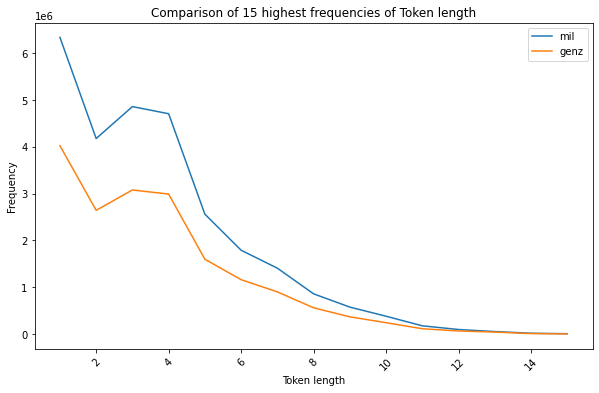

In [62]:
token_dict = stylometry_comparison(generational_tokens, 'Token')

In [81]:
# average token length:
agv_token_length_mil = sum(token_dict['mil'])/len(token_dict['mil'])
agv_token_length_genz = sum(token_dict['genz'])/len(token_dict['genz'])
agv_token_length_mil, agv_token_length_genz

(99.06818181818181, 152.32432432432432)

# Words

In [63]:
# transform the generation' corpora into lists of word tokens
generational_words = {}
generational_words['mil'] = [token.lower() for token_list in tokens_mil for token in token_list if token.isalpha()]
generational_words['genz'] = [token.lower() for token_list in tokens_genz for token in token_list if token.isalpha()]

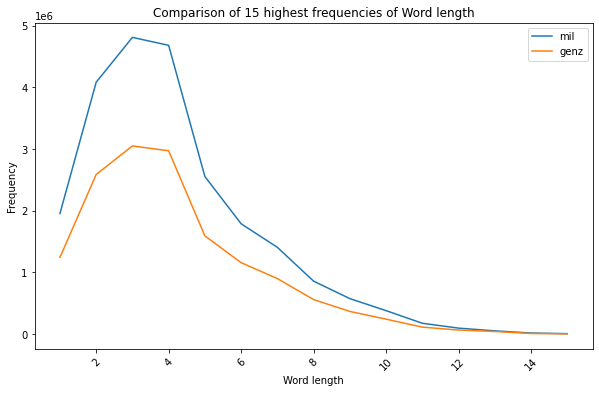

In [64]:
word_dict = stylometry_comparison(generational_words, 'Word')

In [80]:
# average word length:
agv_word_length_mil = sum(word_dict['mil'])/len(word_dict['mil'])
agv_word_length_genz = sum(word_dict['genz'])/len(word_dict['genz'])
agv_word_length_mil, agv_word_length_genz

(102.67948717948718, 155.16666666666666)

# Document length

In [65]:
generational_token_sentence = {}

# gets all tokens of the whole reddit in one list
generational_token_sentence['mil'] = []
for token_list in tokens_mil:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence['mil'].append(word_sentence)

generational_token_sentence['genz'] = []
for token_list in tokens_mil:
    word_sentence = []
    for token in token_list:
        if token.isalpha():
            word_sentence.append(token)
    generational_token_sentence['genz'].append(word_sentence)

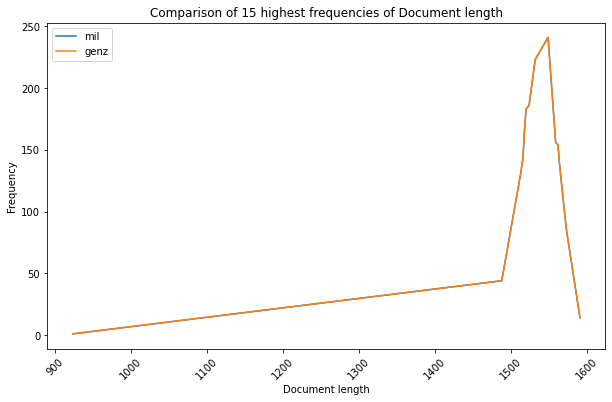

In [66]:
docu_dict = stylometry_comparison(generational_token_sentence, 'Document')

In [83]:
# average document length:
agv_sent_length_mil = sum(docu_dict['mil'])/len(docu_dict['mil'])
agv_sent_length_genz = sum(docu_dict['genz'])/len(docu_dict['genz'])
agv_sent_length_mil, agv_sent_length_genz

(1032.700867052023, 1032.700867052023)

# Sentence

In [67]:
mil = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 1996)]
genz = df_birth_year[(1996 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]

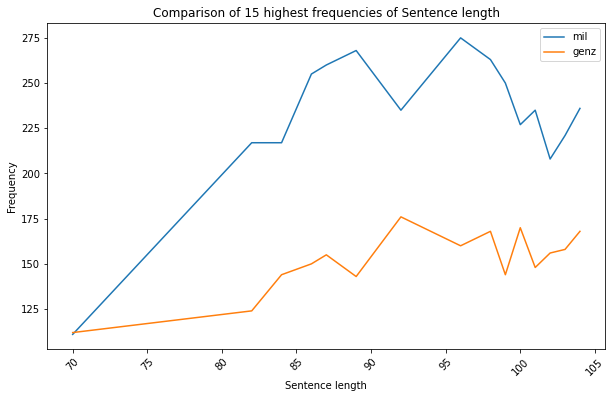

In [68]:
sent_dict = stylometry_comparison(0,'Sentence', mil, genz)

In [82]:
# average sentence length:
total_sentences_mil = sum(sent_dict['mil'].values())
avg_sent_len_mil = sum(length * freq for length, freq in sent_dict['mil'].items()) / total_sentences_mil

total_sentences_genz = sum(sent_dict['genz'].values())
avg_sent_len_genz = sum(length * freq for length, freq in sent_dict['genz'].items()) / total_sentences_genz
avg_sent_len_mil, avg_sent_len_genz

(97.15900469362823, 91.8115532215714)

# Stopwords

In [69]:
def stopwords_comparison(corpus):
    stopwords_by_author_dict = {}
    stop_words = set(stopwords.words('english'))
    generations = list(corpus.keys())
    gen1, gen2 = generations
    stopwords_gen1 = [word for word in corpus[gen1] if word in stop_words]
    stopwords_gen2 = [word for word in corpus[gen2] if word in stop_words]
    stopwords_by_author_dict[gen1] = nltk.FreqDist(stopwords_gen1)
    stopwords_by_author_dict[gen2] = nltk.FreqDist(stopwords_gen2)

    # Extract the 50 most common stopwords for both generations
    common_stopwords = list((stopwords_by_author_dict[gen1] + stopwords_by_author_dict[gen2]).keys())[:50]
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [stopwords_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [stopwords_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 50 Most Common Stopwords - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return stopwords_by_author_dict

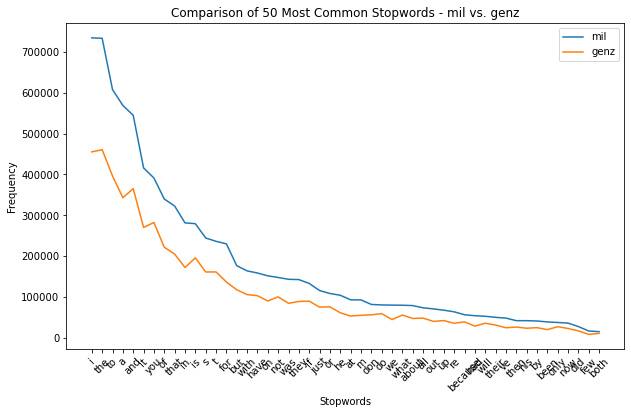

In [70]:
stopwords_dict = stopwords_comparison(generational_tokens)

# Punctuation

In [71]:
def punctuation_comparison(corpus):
    punctuation_by_author_dict = {}
    generations = list(corpus.keys())
    gen1, gen2 = generations
    punctuation_gen1 = [word for word in corpus[gen1] if word in string.punctuation]
    punctuation_gen2 = [word for word in corpus[gen2] if word in string.punctuation]
    punctuation_by_author_dict[gen1] = nltk.FreqDist(punctuation_gen1)
    punctuation_by_author_dict[gen2] = nltk.FreqDist(punctuation_gen2)

    # Extract the 50 most common punctuation for both generations
    common_stopwords = list((punctuation_by_author_dict[gen1] + punctuation_by_author_dict[gen2]).keys())[:50]
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [punctuation_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [punctuation_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 50 Most Common Stopwords - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return punctuation_by_author_dict

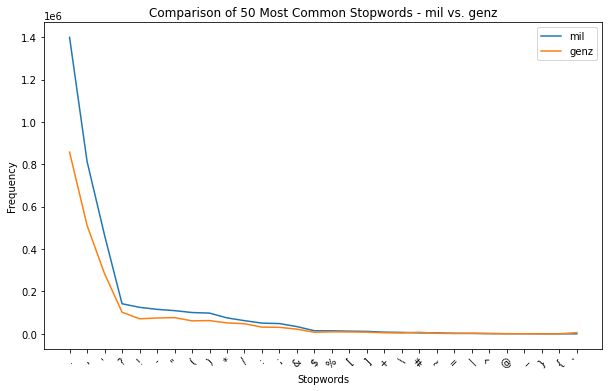

In [72]:
punc_dict = punctuation_comparison(generational_tokens)

# POS

In [57]:
def parts_of_speech_comparison(corpus):
    pos_by_author_dict = {}
    generations = list(corpus.keys())
    gen1, gen2 = generations
    punctuation_gen1 = [pos[1] for pos in nltk.pos_tag(corpus[gen1])]
    punctuation_gen2 = [pos[1] for pos in nltk.pos_tag(corpus[gen2])]
    pos_by_author_dict[gen1] = nltk.FreqDist(punctuation_gen1)
    pos_by_author_dict[gen2] = nltk.FreqDist(punctuation_gen2)

    # Extract the POSses for both generations
    common_stopwords = list((pos_by_author_dict[gen1] + pos_by_author_dict[gen2]).keys())
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [pos_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [pos_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of POS tags - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    return pos_by_author_dict

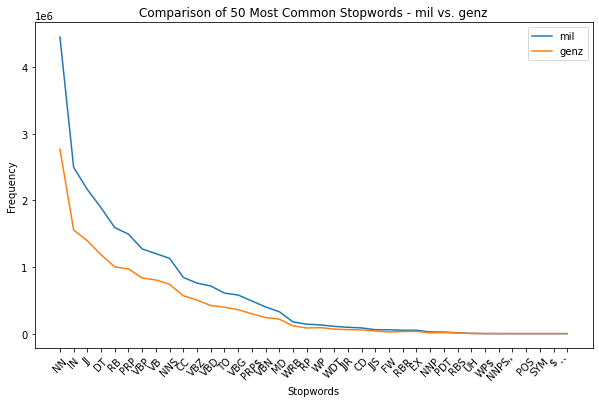

In [59]:
pos_dict = parts_of_speech_comparison(generational_words)

# Account for differences in corpus length

In [ ]:
# random sample, random over/undersample